# Fundamentals of Data Analysis: Linear Regression Project

Julian Dunne (g00267940@gmit.ie)

The purpose of this project is to explain and demonstrate with worked examples, simple linear regression using Python
on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. This porject will include:

1. Jupyter notebook that performs simple linear regression on the data set.

2. In that notebook, an explanation of your regression and an analysis of its accuracy.

3. Standard items in a git repository such as a README.
***

# Part 1) Initial analysis:
Understanding the dataset. Import the dataset as a pandas dataframe and plot values to see how the dataset is distributed.

In [2]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [3]:
#Import powerprdouction dataset as pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

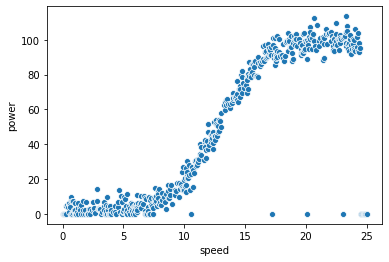

In [4]:
#Scatterplot of data using Seaborn
sns.scatterplot(df['speed'], df['power']);

The scatterplot shows that there is a correlation between speed and power output. When speed is approx 0-7.5 the power output is minimal <10. As speed increases approx 7.5-17.5 there is a higher power output 10-100. As speed increases >25 power output remains constant ~100.

It is clear from the figure above that there is values which are not correct for speed versus power e.g. power equals 0.000 when speed is 20. As this is the first time the author is using Sklearn and for comparrison purposes the full powerproduction dataset will be used as part of the initial analysis, including all 0.000 outliers.

## Linear Regression Straight Line Plot:
Although the scatterplot suggests a straight line linear regression plot would not be the best fit for this dataset. For the purposes of this initial test and becoming familiar with Scikit it will serve a purpose. 

In [5]:
# Divide dataset into X (independent variable) and Y (dependent variable)
X_initial = df['speed'].values.reshape(-1,1)
y_initial = df['power'].values.reshape(-1,1)

# Using reshape method change to a 2-d array to avoid ValueError 
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

In [6]:
# Create linear regression object
initial_reg = LinearRegression()

In [7]:
# Fit the model to the dataset without training.
initial_reg.fit(X_initial, y_initial)

LinearRegression()

## Predict power output without training the model:
This is will be used for comparrison purposes only.

In [8]:
# Predict power output
y_in_pred = initial_reg.predict(X_initial)

In [9]:
# Create dataframe of actual versus predicted values
# https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
df_initial = pd.DataFrame({'Actual': y_initial.flatten(), 'Predicted': y_in_pred.flatten()})
pd.set_option('display.max_rows', None)
df_initial.head()

,Actual,Predicted
0,0.0,-13.899903
1,0.0,-13.285203
2,0.0,-13.162263
3,0.0,-12.793444
4,0.0,-12.547564


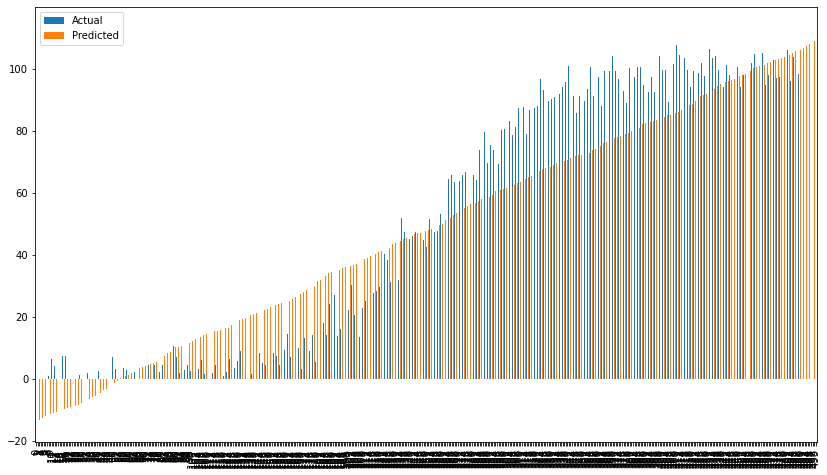

In [10]:
# Plot Actual versus Predicted values
df_initial.plot(kind='bar',figsize=(14,8))
plt.show()

Although the model has not been trained, the chart suggests that a straight line plot is not suitable for this dataset as different speeds outside of a certain range does not always result in increased power output. 

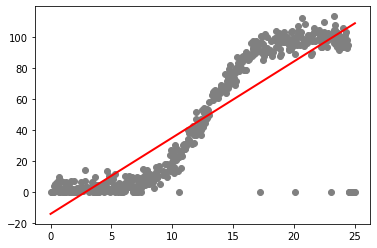

In [11]:
# Scatterplot of Speed v Power with linear regression straight line plot
plt.scatter(X_initial, y_initial,  color='gray')
plt.plot(X_initial, y_in_pred, color='red', linewidth=2)
plt.show()

The model attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py.

## Calculating the error:
When calculating the error of the straight line plot, the closer the values are to zero the more accurate the model.

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_initial, y_in_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_initial, y_in_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_initial, y_in_pred)))

Mean Absolute Error: 14.475951557238288
Mean Squared Error: 468.48232830642434
Root Mean Squared Error: 21.644452598909133


The values above will be used for comparison purposes as part of this assignment.

# Part 2) Training the model:
Initial analysis of the dataset did not involve training the model and it was clear when trying to predict power output for a given speed that the machine learning algorithm was not very accurate. The next part of this assignment involves training the model using the same straight line plot method and seeing if there is a noticeable improvement.

In [13]:
# Divide dataset into a new set of X and Y variables
X_second = df['speed'].values.reshape(-1,1)
y_second = df['power'].values.reshape(-1,1)

In [14]:
# Create a secondlinear regression object
second_reg = LinearRegression()

In [15]:
# Split the data for training/testing - set random_state so that the selected data is always the same
X_train, X_test, y_train, y_test = train_test_split(X_second, y_second, test_size=0.3, random_state=0)

In [16]:
# Train the model using the training sets
second_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
# Pedict power output
y_pred = second_reg.predict(X_test)

In [18]:
df_train = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_train.head()

,Actual,Predicted
0,7.060,9.889791
1,51.149,48.345720
2,71.763,57.092868
3,99.357,96.164447
4,113.556,100.355789


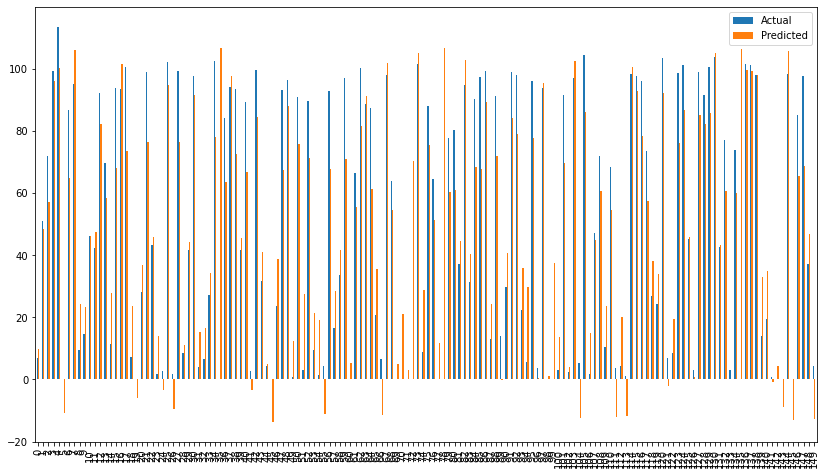

In [20]:
# Plot Actual versus Predicted values
df_train.plot(kind='bar',figsize=(14,8))
plt.show()

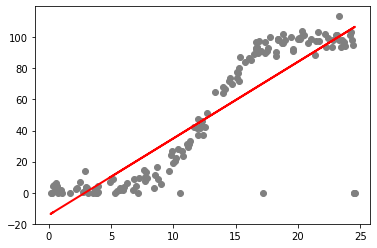

In [19]:
# Scatterplot of Speed v Power with linear regression straight line plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
# Calculating the error:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.46211643465891
Mean Squared Error: 459.6312892379741
Root Mean Squared Error: 21.439013252432446


## Comparing trained and untrained model results:
The calculated results would appear quite similar for both sets of results, however by increasing/decreasing the test size also causes the calculated errors to change. Reducing the tests size means there is less errors and increasing the test size means more errors to be added.

Based on these results it is not clear that training the model has increased accuracy. This again shows why the straight line plot is not suitable. The last part of this comparison using the straight line model will involve removing the 0.0 values from the dataset.
***

# Part 3) Removing zero values
This next part of the analysis focuses on removing rows with 0.0 power output values. This is just to clean up the data to see if removing instances of extreme outliers such as when speed ~17.5 and a power output of 0.0 was recorded. 

In [23]:
# Create a dataframe with 0.0 values removed 
df_rem0 = df

# Replace all 0.000 values in 'power' data series with nan value
df_rem0['power'].replace(0.000, np.nan, inplace=True)

# Drop all rows from dataframe with nan value
df_rem0.dropna(inplace=True)

In [24]:
# Divide new dataset into set of X and Y variables
X_rem0 = df_rem0['speed'].values.reshape(-1,1)
y_rem0 = df_rem0['power'].values.reshape(-1,1)

In [ ]:
# Create a new linear regression object
regressor_rem0 = LinearRegression()

In [49]:
# Split the data for training/testing - set random_state so that the selected data is always the same
X_rem0_train, X_rem0_test, y_rem0_train, y_rem0_test = train_test_split(X_rem0, y_rem0, test_size=0.3, random_state=0)

In [50]:
# Train the model using the training sets
regressor_rem0.fit(X_rem0_train, y_rem0_train)

LinearRegression()

In [51]:
y_rem0_pred = regressor_rem0.predict(X_rem0_test)

In [52]:
df_rem0_pred = pd.DataFrame({'Actual': y_rem0_test.flatten(), 'Predicted': y_rem0_pred.flatten()})
df_rem0_pred.head()

,Actual,Predicted
0,9.385,23.657162
1,0.132,1.102543
2,80.418,67.605160
3,93.698,74.838353
4,65.605,55.894553


In [53]:
# Calculating the error:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_rem0_test, y_rem0_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_rem0_test, y_rem0_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_rem0_test, y_rem0_pred)))

Mean Absolute Error: 11.75568111431187
Mean Squared Error: 190.56823555495077
Root Mean Squared Error: 13.804645433873004


## Linear Regression Striaght Line Plot findings:
It was clear from the start that a straight line plot was not the right fit for this dataset. However it was interesting to step through the process showing that when a model is not suitable for a dataset it doesn't really matter if it is trained or not, the results will not be very good. In addition to this, it was clear the impact that outlier values can have on results when determining the accuracy of the applied regression model.

The next part of this assignment will focus on applying a linear regression model that correctly fits the dataset.
***